In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# CUSTOMIZATION

import seaborn as sns
import matplotlib
from matplotlib import ticker, cm, colors
import matplotlib.tri as tri

# font type
matplotlib.rcParams['text.usetex'] = True
sns.set(style="ticks")
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman')

sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman'})

# color
sns.set_palette("muted")


# font size
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
def interpolate_grid(xs_sample, ys_sample, zs_sample, xs_grid, ys_grid):
    triang = tri.Triangulation(xs_sample, ys_sample)
    interpolator = tri.LinearTriInterpolator(triang, zs_sample)
    Xi, Yi = np.meshgrid(xs_grid, ys_grid)
    zi = interpolator(Xi, Yi)
    return Xi, Yi, zi

def interpolate_grid_old(xs_sample, ys_sample, zs_sample, xs_grid, ys_grid):
    zs_grid = np.nan * np.ones([len(xs_grid), len(ys_grid)])
    for ix,x in enumerate(xs_grid):
        for iy,y in enumerate(ys_grid):
            closest = np.argmin((x-xs_sample)**2 + (y-ys_sample)**2)
            zs_grid[ix, iy] = zs_sample[closest]
    return zs_grid

# Max Admissible Errors

The condition

$$ \epsilon < \min\left\{\max\left\{ \frac{\left \|L_\mathbf{g}h(\mathbf{x}) \right\|}{2\mathfrak{L}_{L_\mathbf{g}h}}, \frac{L_\mathbf{f}h(\mathbf{x}) +  \alpha(h(\mathbf{x}))}{2(\mathfrak{L}_{L_\mathbf{f}h} + \mathfrak{L}_{\alpha \circ h})} \right\}, \right\} $$



In [4]:
from max_feasible_error import get_gridded_eps

theta_eq = 0.138324423615

state_labels = ['$x$', '$y$', '$\\theta_z$', '$\\dot{x}$', '$\\dot{\\theta}_z$', '$\\theta_y$', '$\\dot{\\theta}_y$']


# # specifying upper_bd, lower_bd, num_grid
# grid_limits = np.array([[0, 0, 1], # x 
#                         [0, 0, 1], # y
#                         [0, 0, 1], # theta_z
#                         [-2, 2, 20], # xd
#                         [0, 0, 1], # thetad_z
#                         [-0.5+theta_eq, 0.5+theta_eq, 30], # theta_y
#                         [-2, 2, 30]]) # thetad_y

eps_grid, pos = get_gridded_eps()
print(eps_grid.shape)

(900,)


In [5]:
eps_grid

eps_per_theta = []

for x5 in np.unique(pos[:,0]):
    eps_per_theta.append(np.min(eps_grid[pos[:,0]==x5]))

In [6]:
color_grid.shape

NameError: name 'color_grid' is not defined

In [ ]:
pos

In [ ]:
# plt.figure(figsize=[5,4])

# xs_grid = np.linspace(-0.4, 0.4, 10)
# ys_grid = np.linspace(-1.5, 1.5, 10)
# color_grid, - = interpolate_grid(pos[:,0]-theta_eq, pos[:,1], eps_grid.flatten(),
#                               xs_grid, ys_grid)



# plt.contour(xs_grid, ys_grid, color_grid)
# # plt.imshow(eps_grid.T) #, extent=[grid_limits[5, 0],grid_limits[5, 1],grid_limits[6, 0],grid_limits[6, 1]])
# # plt.ylim([-1,1])
# plt.ylabel('$\dot{\\theta}$')
# # plt.plot(np.linspace(*grid_limits[5])-theta_eq, eps_grid.flatten())
# plt.xlabel('$\\theta - \\theta_*$')
# # plt.ylabel('upper bound on $\\varepsilon(\mathbf x)$')
# # plt.colorbar()
# plt.tight_layout()

# # plt.figure(figsize=[4,2])
# # plt.plot(np.unique(pos[:,0])-theta_eq, eps_per_theta)
# # plt.ylabel('max $\\varepsilon(\mathbf x)$')
# # plt.xlabel('$\\theta - \\theta_*$')

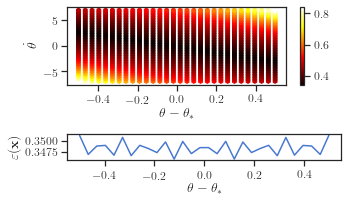

In [7]:
# plt.figure(figsize=[5,3])

# plt.imshow(eps_grid_2d, extent=[-1,1,grid_limits[5, 0],grid_limits[5, 1]])
# X , Y = np.meshgrid( np.linspace(*grid_limits[5])-theta_eq , np.linspace(*grid_limits[6]) )

# gs = gridspec.GridSpec(2, 2)
# plt.subplot(2,1,1)

# plot it
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=[5,3])


color = eps_grid
# color[eps_grid<0] = 0
im = a0.scatter(pos[:,0]-theta_eq, pos[:,1], c=eps_grid.flatten(), marker='h', cmap='hot', s=20)
# plt.imshow(eps_grid.T) #, extent=[grid_limits[5, 0],grid_limits[5, 1],grid_limits[6, 0],grid_limits[6, 1]])
# plt.ylim([-1,1])
a0.set_ylabel('$\dot{\\theta}$')
# plt.plot(np.linspace(*grid_limits[5])-theta_eq, eps_grid.flatten())
a0.set_xlabel('$\\theta - \\theta_*$')
# plt.ylabel('upper bound on $\\varepsilon(\mathbf x)$')
plt.colorbar(im, ax=a0)
# im.set_clim([0,0.2])

# plt.subplot(2,1,2)
# plt.figure(figsize=(4.5, 1))
a1.plot(np.unique(pos[:,0])-theta_eq, eps_per_theta)
a1.set_ylabel('$\\varepsilon(\mathbf x)$')
a1.set_xlabel('$\\theta - \\theta_*$')
plt.tight_layout()

plt.savefig('../data/max_eps.pdf')


In [ ]:
eps_grid

# Training Data

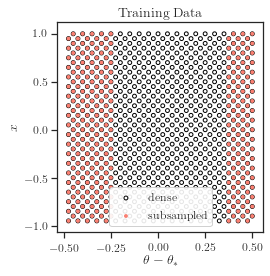

In [186]:
from train_models import get_test_train_data

train_data_fns = ['gridded2_train.csv', 'gridded2_sampled.csv'] # TODO two different training sets

plt.figure(figsize=[4,4])
plot_kwargs_list = [dict(label='dense', marker='o', color="none", edgecolor="black"),
                    dict(label='subsampled', marker='o', edgecolor='none', color='salmon')]
# i = 0
for train_data_fn, kwargs in zip(train_data_fns, plot_kwargs_list):
    data = np.load('../data/' + train_data_fn.split('.')[0] + '_processed.npz')
    states = data['states']
#     plt.subplot(1,2,1+i)
#     i += 1
    plt.scatter( states[:,5]-theta_eq,states[:,0], **kwargs, s=15)
    plt.ylabel('$x$')
    plt.xlabel('$\\theta - \\theta_*$')
# plt.xlim([-0.5, 1])
plt.title('Training Data')
plt.legend(framealpha=0.9)
plt.tight_layout()

plt.savefig('../data/training.pdf')


In [9]:
np.sqrt(data['states'].shape[0])

17.88854381999832

# Errors

In [182]:
from train_models import get_test_train_data
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.kernel_ridge import KernelRidge


train_data_fns = ['gridded2_train.csv', 'gridded2_sampled.csv']  # two different training sets
greyscale = True
downscale = 2
image_tag = ''
if greyscale:
    image_tag += '_grey'
if downscale:
    image_tag += '_' + str(downscale)

test_data = 'uniform'
# test_data = [[-1, -0.5], [-1, 0.5],
#                  [1, -0.5], [1, 0.5],
#                  [0, 0]]


val_data_fn = 'gridded2_evaluation.csv' # TODO: need validation data
Xs, ys = get_test_train_data(val_data_fn, None,
                             greyscale=True, downscale=2, noise=[0.,0.])
data = np.load('../data/' + val_data_fn.split('.')[0] + '_processed.npz')
states = data['states']


In [183]:
model_list = []
load_file=True
for train_data_fn in train_data_fns:
    assert states.shape[0] == ys.shape[0]
    
    if load_file:
    
        filetag = '_train{}_test{}{}'.format(train_data_fn, test_data, image_tag)

        # loading model parameters
        data = np.load('../data/coeff{}.npz'.format(filetag))
        coeff = data['coeff'] # n_train by n_target
        gamma = data['gamma'] # scalar parameter for RBF kernel
        Xs_train = data['Xs_train'] # n_train by n_features training data
        print(gamma, data['alpha'])
        
    else:
        alpha = 1e-6
        gamma = 5e-8
        reg = KernelRidge(kernel='rbf')
        reg.set_params(alpha=alpha, gamma=gamma)
        Xs_train, ys_train = get_test_train_data(train_data_fn, None,
                                     greyscale=True, downscale=2)
        reg.fit(Xs_train, ys_train)
        coeff = reg.dual_coef_
    model_list.append((Xs_train,coeff,gamma))

5.409214935479613e-08 0.0
5.409214935479613e-08 0.0


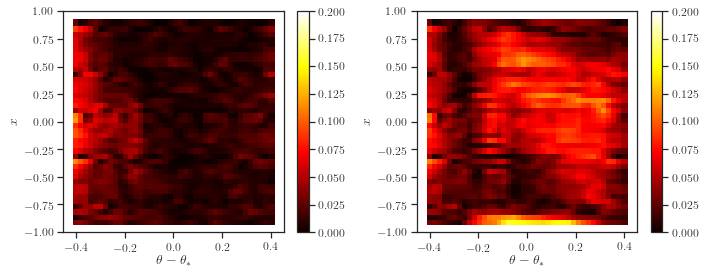

In [185]:
from sklearn.kernel_ridge import KernelRidge

plt.figure(figsize=[10,4])
i = 0
for (Xs_train,coeff,gamma) in model_list:
    assert states.shape[0] == ys.shape[0]


    # prediction
    K = rbf_kernel(Xs, Xs_train, gamma=gamma)
    ys_pred = np.dot(K, coeff)

    # todo: should we look only at theta errs?
    errs = np.linalg.norm(ys-ys_pred, axis=1)
    errs = np.abs(ys[:,1]-ys_pred[:,1])
    
    plt.subplot(1,2,1+i)
    i += 1
    
    xs_grid = np.linspace(-0.4, 0.4, 40)
    ys_grid = np.linspace(-.9, .9, 40)
    Xi, Yi, color_grid = interpolate_grid(states[:,5]-theta_eq, states[:,0], errs,
                                  xs_grid, ys_grid,)





#     plt.scatter(states[:,5]-theta_eq, states[:,0], c=errs, marker='s')
    plt.scatter(Xi, Yi, c=color_grid, marker='s', cmap='hot')
#     plt.contourf(xs_grid, ys_grid, color_grid, levels=np.logspace(-4,0,10), 
#                  norm=colors.LogNorm(vmin=1e-4, vmax=1))
#     plt.imshow(color_grid, extent=[min(xs_grid), max(xs_grid), min(ys_grid), max(ys_grid)])
#     plt.axis('equal')
    plt.ylabel('$x$')
    plt.xlabel('$\\theta - \\theta_*$')
    plt.clim([0, 0.2])
    plt.colorbar()
plt.tight_layout()
    


    # plt.figure(figsize=[10,5])
    # i = 0
    # for train_data_fn in train_data_fns:
    #     data = np.load('../data/' + train_data_fn.split('.')[0] + '_processed.npz')
    #     states = data['states']
    #     plt.subplot(1,2,1+i)
    #     i += 1
    #     plt.scatter(states[:,0], states[:,5], marker='x')
    #     plt.xlabel('$x$')
    #     plt.ylabel('$\\theta$')
    # plt.tight_layout()
plt.savefig('../data/errors.pdf')


In [107]:
np.amin(states[:,5]-theta_eq)

-0.4750000000000004

In [104]:
np.amax(states[:,5]-theta_eq)

0.5

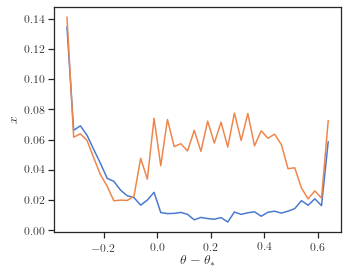

In [29]:

plt.figure(figsize=[5,4])
i = 0
for (Xs_train,coeff,gamma) in model_list:

    # prediction
    K = rbf_kernel(Xs, Xs_train, gamma=gamma)
    ys_pred = np.dot(K, coeff)

    # todo: should we look only at theta errs?
    errs = np.linalg.norm(ys-ys_pred, axis=1)
    errs = np.abs(ys[:,1]-ys_pred[:,1])
    
#     plt.scatter(states[:,5]-0, states[:,0], c=errs, marker='s')
    errs_theta = []
    for theta in np.unique(states[:,5]):
        errs_theta.append(np.mean(errs[np.where(states[:,5]==theta)]))
    plt.plot(np.unique(states[:,5]), errs_theta)

    plt.ylabel('$x$')
    plt.xlabel('$\\theta - \\theta_*$')
plt.tight_layout()

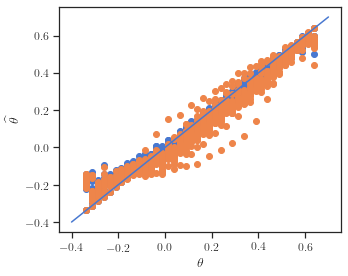

In [30]:

plt.figure(figsize=[5,4])
i = 0
for (Xs_train,coeff,gamma) in model_list:
    assert states.shape[0] == ys.shape[0]
    
    # prediction
    K = rbf_kernel(Xs, Xs_train, gamma=gamma)
    ys_pred = np.dot(K, coeff)

    # todo: should we look only at theta errs?
    errs = np.linalg.norm(ys-ys_pred, axis=1)
    errs = np.abs(ys[:,1]-ys_pred[:,1])
    plt.scatter(ys[:,1],ys_pred[:,1])

    plt.xlabel('$\\theta$')
    plt.ylabel('$\widehat{\\theta}$')
plt.plot([-0.4, 0.7], [-0.4, 0.7])
plt.tight_layout()

In [76]:
for theta in np.unique(states[:,5]):
    np.max(errs[np.where(states[:,5]==theta)])

In [55]:
ys.shape

(800, 2)